# **Root finding**

This notebooks shows how to implement the following methods
- `bisect`
- `fixedpt`
- `newton`
- `newtonMod`

In [55]:
# this is not a necessary import, I just have it here because vscode requires it
# to run the script in the same directory as the script
# and not the directory where the script is located

import sys

sys.path.append("..")

In [56]:
import numpy as np

---

## **Bisection method**

The bisection method is a root-finding algorithm that repeatedly divides an interval in half and selects the subinterval where a root exists. This method works by continuing to narrow down the interval until the desired accuracy is achieved.

In this example, we're finding a root of the function $f(x) = x - e^{-x}$ in the interval $[0, 1]$.

**How the algorithm works:**
1. Start with an interval $[a, b]$ where $f(a)$ and $f(b)$ have opposite signs
2. Calculate the midpoint $p = \frac{a+b}{2}$
3. Evaluate $f(p)$
4. If $f(p)$ is close enough to zero, we've found our root
5. Otherwise, replace either a or b with p to form a new, smaller interval containing the root
6. Repeat until the interval is smaller than our desired tolerance

The results show that after $20$ iterations, we've narrowed down the root to approximately $0.567143$, with the function value very close to zero.


In [57]:
from functions.roots import bisect

f = lambda x: x - np.exp(-x)
a = 0
b = 1

r = bisect(f, a, b)

display(r)

,a,b,p,f(p),Iteration
0,0.000000,1.000000,0.500000,-1.065307e-01,1
1,0.500000,1.000000,0.750000,2.776334e-01,2
2,0.500000,0.750000,0.625000,8.973857e-02,3
3,0.500000,0.625000,0.562500,-7.282825e-03,4
4,0.562500,0.625000,0.593750,4.149755e-02,5
5,0.562500,0.593750,0.578125,1.717584e-02,6
6,0.562500,0.578125,0.570312,4.963760e-03,7
7,0.562500,0.570312,0.566406,-1.155202e-03,8
8,0.566406,0.570312,0.568359,1.905360e-03,9
9,0.566406,0.568359,0.567383,3.753492e-04,10


---

## **Fixed point iteration**

Fixed point iteration is a simple root-finding method that works by rewriting an equation $f(x) = 0$ as $x = g(x)$ and then iteratively applying the function $g$ until convergence.

In this example, we're finding a root of the function $f(x) = x - e^{-x}$ by rewriting it as $x = e^{-x}$ and using the function $g(x) = e^{-x}$ for iteration.

**How the algorithm works:**
1. Start with an initial guess $x_0$
2. Calculate the next approximation $x_{n+1} = g(x_n)$
3. Repeat until $|x_{n+1} - x_n|$ is less than our desired tolerance
4. If the iteration converges, the limit point is a fixed point of $g$ and a root of $f$

The method requires that $g$ is a contraction mapping in the neighborhood of the root for guaranteed convergence.


In [58]:
from functions.roots import fixedpt as fixpt

g = lambda x: np.exp(-x)
x0 = 0.6

r = fixpt(g, x0)

display(r)

,Iteration,p,Absolute Error
0,1,0.548812,5.118836e-02
1,2,0.577636,2.882421e-02
2,3,0.561224,1.641222e-02
3,4,0.570511,9.286929e-03
4,5,0.565237,5.273765e-03
5,6,0.568226,2.988800e-03
6,7,0.566530,1.695777e-03
7,8,0.567491,9.615234e-04
8,9,0.566946,5.453939e-04
9,10,0.567255,3.092932e-04


---

## **Newton's Method**

Newton's method, also known as the Newton-Raphson method, is a powerful root-finding algorithm that uses the first derivative of a function to find better approximations.

**How the algorithm works:**
1. Start with an initial guess $x_0$
2. Calculate the next approximation using: $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$
3. Repeat until convergence criteria are met

This method usually converges much faster than bisection or fixed-point iteration, with quadratic convergence rate near the root. However, it requires calculating (or approximating) the derivative and may fail to converge if the initial guess is poor or if the function has complex behavior.

In this example, we're finding the root of $f(x) = e^{-x} - x$ starting with an initial guess of $0.5$.

In [73]:
from functions.roots import newton as nt

f = lambda x: np.exp(-x) - x
x0 = 0.5

root,abs_err,iterations,fp = nt(f,x0)

print(f"Root using Newton's method: {root}")
print(f"Absolute error: {abs_err}")
print(f"Iterations: {iterations}")
print(f"Function value at root: {fp}")

Root using Newton's method: 0.5671431650348294
Absolute error: 0.0008321618392967967
Iterations: 2
Function value at root: 1.9648052307363884e-07


---

## **Modified Newton's Method**

Modified Newton's method is an enhanced version of the standard Newton-Raphson method for finding roots of nonlinear equations. This approach incorporates second derivative information to accelerate convergence, making it particularly effective for multiple roots where the standard Newton's method might converge slowly.

**How the algorithm works:**
1. Start with an initial guess $x_0$
2. Calculate the next approximation using: $x_{n+1} = x_n - \frac{f(x_n) \cdot f'(x_n)}{f'(x_n)^2 - f(x_n) \cdot f''(x_n)}$
3. Repeat until convergence criteria are met

This method generally achieves cubic convergence for simple roots and quadratic convergence for multiple roots, compared to the linear convergence of standard Newton's method for multiple roots.

In the following example, we find the root of a more complex function with oscillatory behavior.


Root using modified Newton's method: 3.1387115810658717
Absolute error: 0.13871158106587167
Iterations: 1
Function value at root: -1.6453437191981333e-08


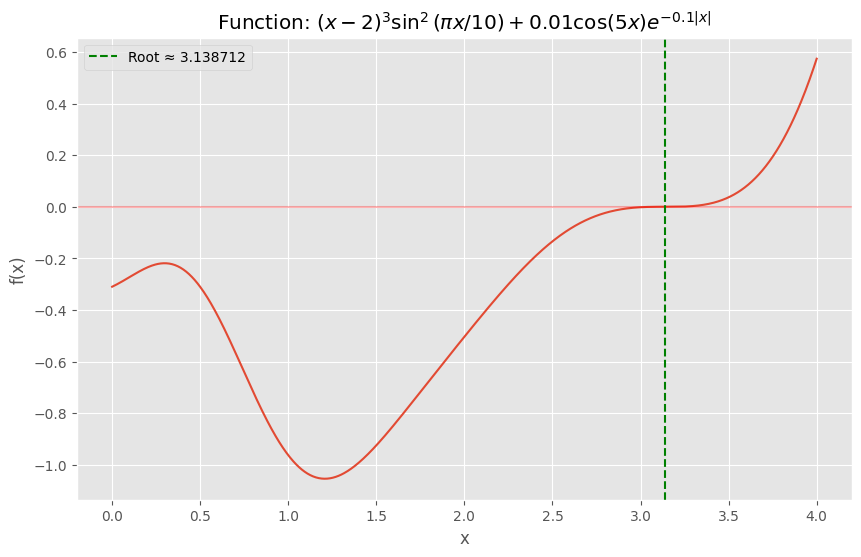

In [74]:
from functions.roots import newtonMod
import matplotlib.pyplot as plt
plt.style.use('ggplot')

f = lambda x: (x-np.pi)**3 * (np.sin(np.pi*x/10)**2 + 0.01*np.cos(5*x) * np.exp(-0.1*abs(x)))
x0 = 3

root,abs_err,iterations,fp = newtonMod(f,x0)

print(f"Root using modified Newton's method: {root}")
print(f"Absolute error: {abs_err}")
print(f"Iterations: {iterations}")
print(f"Function value at root: {fp}")


x_vals = np.linspace(0, 4, 1000)
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.axvline(x=root, color='g', linestyle='--', label=f'Root ≈ {root:.6f}')
plt.title('Function: $(x-2)^3 \\sin^2(\\pi x/10) + 0.01\\cos(5x)e^{-0.1|x|}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.show()